In [2]:
import numpy as np

In [3]:
import numpy as np
from scipy.stats import pearsonr
np.random.seed(0)
size = 300
x = np.random.normal(0, 1, size)
print ("Lower noise", pearsonr(x, x + np.random.normal(0, 1, size)))
print ("Higher noise", pearsonr(x, x + np.random.normal(0, 10, size)))

ModuleNotFoundError: No module named 'scipy'

In [7]:
#using sklearn’s random forest regressor on Boston housing price data set

In [10]:
from sklearn.cross_validation import cross_val_score,ShuffleSplit

In [14]:
from sklearn.datasets import load_boston

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
boston=load_boston()

In [22]:
X=boston["data"]

In [24]:
Y=boston["target"]

In [26]:
names=boston['feature_names']

In [46]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [49]:
rf = RandomForestRegressor(n_estimators=20, max_depth=4)
scores = []

In [60]:
for i in range(X.shape[1]):
     score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",
                              cv=ShuffleSplit(len(X), 3, .3))
     scores.append((round(np.mean(score), 3), names[i]))
print (sorted(scores, reverse=True))

[(0.642, 'LSTAT'), (0.596, 'LSTAT'), (0.573, 'RM'), (0.53, 'RM'), (0.394, 'INDUS'), (0.376, 'PTRATIO'), (0.356, 'INDUS'), (0.354, 'NOX'), (0.341, 'NOX'), (0.307, 'PTRATIO'), (0.299, 'TAX'), (0.277, 'TAX'), (0.187, 'ZN'), (0.184, 'RAD'), (0.167, 'ZN'), (0.164, 'CRIM'), (0.156, 'RAD'), (0.152, 'CRIM'), (0.114, 'DIS'), (0.103, 'B'), (0.093, 'DIS'), (0.091, 'B'), (0.087, 'AGE'), (0.04, 'CHAS'), (0.028, 'AGE'), (0.02, 'CHAS')]


Automatically created module for IPython interactive environment
Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


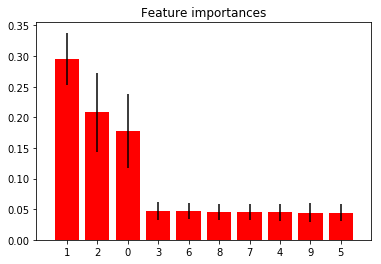

In [62]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv

In [65]:
#get the training data set
df_train = pd.read_csv("C:/Users/lenovo/Desktop/MBAN/P4/machine learning/week 2/HW 2/titanic_train.csv")

In [67]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df_train_all_num = (df_train.apply(lambda x: pd.factorize(x)[0]))
#categorical variables are not good for machine,
#pd.factorize是 指将数据转化为分类变量 factor variable

In [72]:
df_train_all_num.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,0,0,0,0,0,0,-1,0
1,1,1,1,1,1,1,0,0,1,1,0,1
2,2,1,0,2,1,2,1,0,2,2,-1,0
3,3,1,1,3,1,3,0,0,3,3,1,0
4,4,0,0,4,0,3,1,0,4,4,-1,0


In [74]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [76]:
#prepare training X, Y data set
train_y = df_train_all_num['Survived']
#drop unused fields
train_x = df_train_all_num.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)   

In [82]:
#thit is how we get the feature importance with simple steps:
model.fit(train_x, train_y)
# display the relative importance of each attribute
importances = model.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(train_x)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.24712209045900035, 'Sex'), (0.21793737562109922, 'Age'), (0.21329980966910944, 'Fare'), (0.09763377296117809, 'Cabin'), (0.09207732545511513, 'Pclass'), (0.05492225148775702, 'Parch'), (0.04330553102240258, 'SibSp'), (0.03370184332433827, 'Embarked')]


In [84]:
?print(RandomForestClassifier)

forest = RandomForestClassifier(oob_score=True, n_estimators=10000)
没有说就是默认的100
n-estimarot:The number of trees in the forest.
criterion : string, optional (default=”mse”)
The function to measure the quality of a split. 
Supported criteria are “mse” for the mean squared error, 
which is equal to variance reduction as feature selection criterion, 
and “mae” for the mean absolute error.


max_depth : integer or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


min_samples_split : int, float, optional (default=2)
The minimum number of samples required to split an internal node:
    
min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.


bootstrap : boolean, optional (default=True)
Whether bootstrap samples are used when building trees.

oob_score : bool, optional (default=False)
whether to use out-of-bag samples to estimate the R^2 on unseen data.

random_state : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, n_informative=2,random_state=0,shuffle=False)


In [95]:
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)

In [97]:
 regr.fit(X, y)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [98]:
print(regr.feature_importances_)

[0.18146984 0.81473937 0.00145312 0.00233767]
